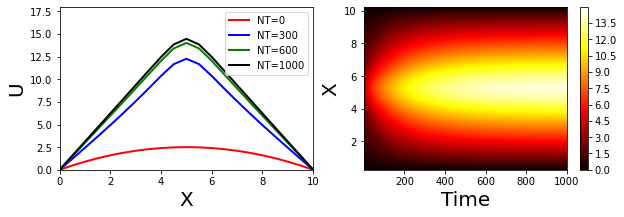

In [3]:
import numpy as np
import pylab as pl

tau = 0.05 #时间步长
h = 0.5 #空间步长
lamda = 1.0 
l = 10.0 #杆长
NT = 1000 #时间步数
A = 1.0*tau/h**2
NX = int(l/h) #空间节点数

U = np.zeros([NX+1,NT+1])  #温度
t = np.arange(0,NT,1)  #时间
x = np.arange(0,(NX+1)*h,h) #坐标

for k in range(NT):  #边界条件
    U[0,k] = 0.0
    U[NX,k] = 0.0

for i in range(0,NX): #初始条件
    U[i,0]=0.1*i*h*(10.0-i*h)
    
for k in range(NT):
    for i in range(1,NX):
        U[i,k+1]=A*U[i+1,k]+(1-2*A)*U[i,k]+A*U[i-1,k] + tau*5.0*np.exp(-2.0*(i*h-5.0)**2)

fig = pl.figure(figsize=(10,3))
ax1 =fig.add_subplot(1,2,1)
ax2 =fig.add_subplot(1,2,2)

ax1.plot(x,U[:,0], 'r-', label='NT=0',linewidth=2.0)
ax1.plot(x,U[:,300], 'b-', label='NT=300',linewidth=2.0)
ax1.plot(x,U[:,600], 'g-', label='NT=600',linewidth=2.0)
ax1.plot(x,U[:,1000], 'k-', label='NT=1000',linewidth=2.0)
ax1.set_ylabel(r'U', fontsize=20)
ax1.set_xlabel(r'X', fontsize=20)
ax1.set_xlim(0,10)
ax1.set_ylim(0,18)
ax1.legend(loc='upper right')

extent = [0,NT+1,0,(NX+1)*h]
levels = np.arange(0.0,15.0,0.01)
cs = ax2.contourf(U,levels,origin='lower',extent=extent,cmap=pl.cm.hot)
cbar = fig.colorbar(cs)
ax2.set_ylabel(r'X', fontsize=20)
ax2.set_xlabel(r'Time', fontsize=20)
pl.show()